# Random Forests

In [1]:
#Imports

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [32]:
#For data
import pandas as pd

#For modelling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

#For plotting
from sklearn.tree import plot_tree

## Importation of data

In [3]:
communes_dataframe = pd.read_csv("COMMUNES.csv", delimiter=";")

In [4]:
ALL_COMMUNES = pd.DataFrame(communes_dataframe).values

Tests:

In [5]:
len(ALL_COMMUNES)
communes_dataframe

,insee,nom,altitude,code_postal,longitude,latitude,pop99,surface,departement,region,indicatif
0,1001,L'Abergement-Clémenciat,257.0,1400,0.085856,0.805508,728,15.70,1,RA,4
1,1002,L'Abergement-de-Varey,367.0,1640,0.094665,0.802987,168,9.14,1,RA,4
2,1004,Ambérieu-en-Bugey,247.0,1500,0.093356,0.802085,11436,24.51,1,RA,4
3,1005,Ambérieux-en-Dombes,293.0,1330,0.085594,0.802784,1408,16.06,1,RA,4
4,1006,Ambléon,400.0,1300,0.097777,0.798493,86,6.03,1,RA,4
5,1007,Ambronay,250.0,1500,0.093540,0.802992,2146,33.64,1,RA,4
6,1008,Ambutrix,270.0,1500,0.093239,0.801795,586,5.19,1,RA,4
7,1009,Andert-et-Condon,330.0,1300,0.098718,0.799283,275,6.95,1,RA,4
8,1010,Anglefort,250.0,1350,0.101384,0.801315,769,29.49,1,RA,4
9,1011,Apremont,900.0,1100,0.098849,0.806517,329,15.09,1,RA,4


## Separation APP/TEST

In [6]:
COMMUNES, TEST_COMMUNES = train_test_split(ALL_COMMUNES, test_size=0.099, random_state=10)

Tests:

In [7]:
print('Length of TEST_COMMUNES')
print(len(TEST_COMMUNES))


print(TEST_COMMUNES)


print(36209==len(TEST_COMMUNES)+len(COMMUNES))

Length of TEST_COMMUNES
3585
[[12160 'Mostuéjouls' 480.0 ... 12 'MP' 5]
 [51626 'La_Villeneuve-lès-Charleville' 210.0 ... 51 'CA' 3]
 [35304 'Saint-Ouen-des-Alleux' 85.0 ... 35 'BR' 2]
 ...
 [65038 'Artigues' 640.0 ... 65 'MP' 5]
 [54545 'Vandeléville' 340.0 ... 54 'LO' 3]
 [62146 'Boiry-Saint-Martin' 85.0 ... 62 'NP' 3]]
True


OK

## Catching values of interests

In [8]:
Y_app=COMMUNES[:,9]
X_app=COMMUNES[:,1]
Y_test=TEST_COMMUNES[:,9]
X_test=TEST_COMMUNES[:,1]

#TEST
print('region: ',Y_app,'\n','nom: ',X_test)

region:  ['PL' 'AL' 'HN' ... 'AL' 'BO' 'AQ'] 
 nom:  ['Mostuéjouls' 'La_Villeneuve-lès-Charleville' 'Saint-Ouen-des-Alleux' ...
 'Artigues' 'Vandeléville' 'Boiry-Saint-Martin']


## Methodology 1: counting the occurences of each letter

In [9]:
dictionnary=['a','z','e','r','t','y','u','i','o','p','q','s','d','f','g','h','j','k','l','m','w','x','c','v','b','n','é','-','è','_','ç','à','ê','ô','ë','ÿ','î','â','û','ü','A','Z','E','R','T','Y','U','I','O','P','Q','S','D','F','G','H','J','K','L','M','W','X','C','V','B','N']

def data_initialization(INPUT,pattern=dictionnary):
    OUTPUT=[]
    for e in INPUT:
        #print(e)
        tmp=[]
        for p in dictionnary:
            #print(p)
            tmp.append(e.count(p))
            #print(tmp)
        OUTPUT.append(array(tmp))
    return(array(OUTPUT))

#TEST
data_initialization(['paris','strasbourg','lille'])

array([[1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [10]:
XX_app=data_initialization(X_app)
XX_test=data_initialization(X_test)

### First random forest

Let's first create a small random forest for vizualzing:

In [11]:
small_rf=RandomForestClassifier(n_estimators=6,max_depth=2)
small_rf.fit(XX_app,Y_app)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

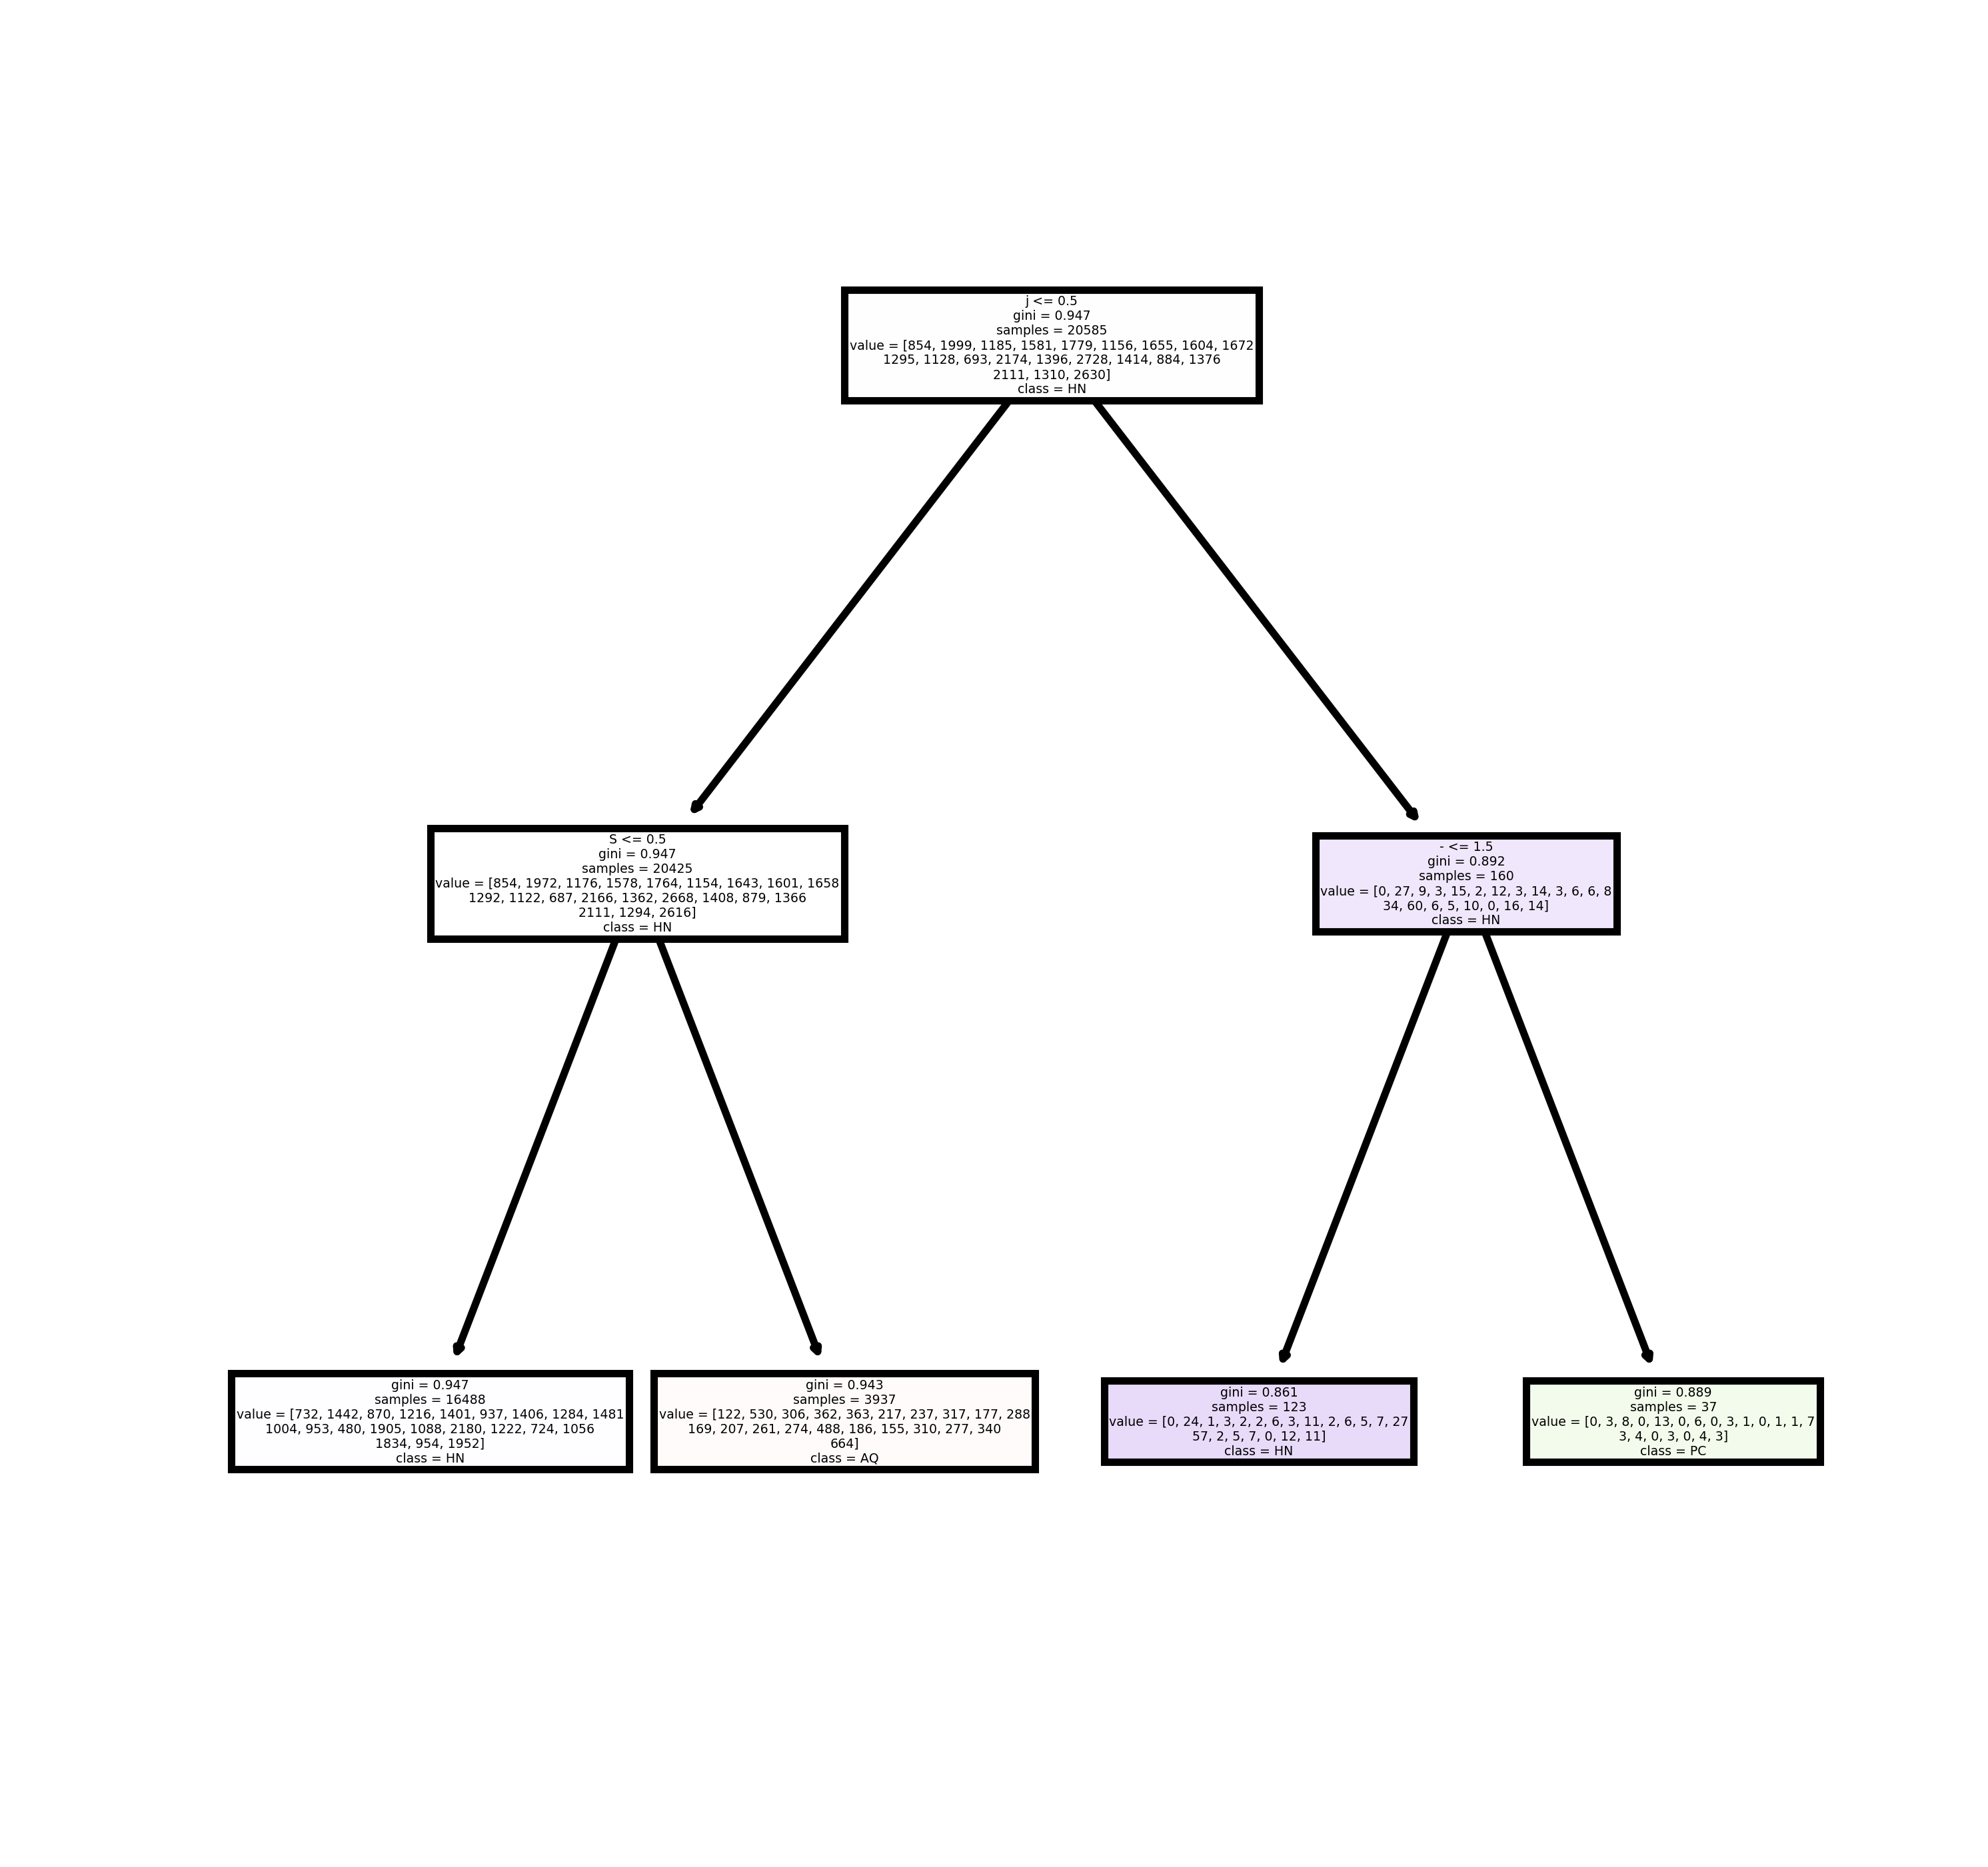

In [12]:
###############
#Printing 1 reduced tree
################

fn=dictionnary
cn=list(set(Y_app))
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(small_rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

### Rf with X validation

In [14]:
############################
########Set the grid########
############################

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =10, stop = 1000, num = 10)]# number of features at every split

# max depth
max_depth = [int(x) for x in np.linspace(1, 100, num = 10)]           
max_depth.append(None)

# create random grid
random_grid = {'n_estimators': n_estimators,'max_depth': max_depth}

In [16]:
############################
######Creation of the RF#####
##########################

rfc = RandomForestClassifier()

# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2)

# Fit the model
rfc_random.fit(XX_app, Y_app)
rfc_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=1000, max_depth=89 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. n_estimators=1000, max_depth=89, total= 2.9min
[CV] n_estimators=1000, max_depth=89 .................................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.0min remaining:    0.0s



[CV] .................. n_estimators=1000, max_depth=89, total= 1.2min
[CV] n_estimators=1000, max_depth=89 .................................
[CV] .................. n_estimators=1000, max_depth=89, total= 1.3min
[CV] n_estimators=890, max_depth=78 ..................................
[CV] ................... n_estimators=890, max_depth=78, total= 1.0min
[CV] n_estimators=890, max_depth=78 ..................................
[CV] ................... n_estimators=890, max_depth=78, total= 1.1min
[CV] n_estimators=890, max_depth=78 ..................................
[CV] ................... n_estimators=890, max_depth=78, total= 1.2min
[CV] n_estimators=560, max_depth=23 ..................................
[CV] ................... n_estimators=560, max_depth=23, total=  32.1s
[CV] n_estimators=560, max_depth=23 ..................................
[CV] ................... n_estimators=560, max_depth=23, total=  29.3s
[CV] n_estimators=560, max_depth=23 ..................................
[CV] 

[CV] ................... n_estimators=230, max_depth=78, total=  16.2s
[CV] n_estimators=890, max_depth=67 ..................................
[CV] ................... n_estimators=890, max_depth=67, total= 1.1min
[CV] n_estimators=890, max_depth=67 ..................................
[CV] ................... n_estimators=890, max_depth=67, total= 1.0min
[CV] n_estimators=890, max_depth=67 ..................................
[CV] ................... n_estimators=890, max_depth=67, total= 1.0min
[CV] n_estimators=890, max_depth=12 ..................................
[CV] ................... n_estimators=890, max_depth=12, total=  29.7s
[CV] n_estimators=890, max_depth=12 ..................................
[CV] ................... n_estimators=890, max_depth=12, total=  27.4s
[CV] n_estimators=890, max_depth=12 ..................................
[CV] ................... n_estimators=890, max_depth=12, total=  25.5s
[CV] n_estimators=890, max_depth=34 ..................................
[CV] .

[CV] ................... n_estimators=670, max_depth=12, total=  19.8s
[CV] n_estimators=670, max_depth=12 ..................................
[CV] ................... n_estimators=670, max_depth=12, total=  18.7s
[CV] n_estimators=670, max_depth=12 ..................................
[CV] ................... n_estimators=670, max_depth=12, total=  19.9s
[CV] n_estimators=340, max_depth=89 ..................................
[CV] ................... n_estimators=340, max_depth=89, total=  24.5s
[CV] n_estimators=340, max_depth=89 ..................................
[CV] ................... n_estimators=340, max_depth=89, total=  22.7s
[CV] n_estimators=340, max_depth=89 ..................................
[CV] ................... n_estimators=340, max_depth=89, total=  25.3s
[CV] n_estimators=120, max_depth=100 .................................
[CV] .................. n_estimators=120, max_depth=100, total=   8.1s
[CV] n_estimators=120, max_depth=100 .................................
[CV] .

[CV] ................... n_estimators=120, max_depth=67, total=   7.8s
[CV] n_estimators=120, max_depth=67 ..................................
[CV] ................... n_estimators=120, max_depth=67, total=   7.8s
[CV] n_estimators=890, max_depth=89 ..................................
[CV] ................... n_estimators=890, max_depth=89, total= 1.0min
[CV] n_estimators=890, max_depth=89 ..................................
[CV] ................... n_estimators=890, max_depth=89, total=  59.9s
[CV] n_estimators=890, max_depth=89 ..................................
[CV] ................... n_estimators=890, max_depth=89, total= 1.0min
[CV] n_estimators=1000, max_depth=78 .................................
[CV] .................. n_estimators=1000, max_depth=78, total= 1.5min
[CV] n_estimators=1000, max_depth=78 .................................
[CV] .................. n_estimators=1000, max_depth=78, total= 1.2min
[CV] n_estimators=1000, max_depth=78 .................................
[CV] .

[CV] ................. n_estimators=1000, max_depth=100, total= 1.2min
[CV] n_estimators=340, max_depth=56 ..................................
[CV] ................... n_estimators=340, max_depth=56, total=  25.4s
[CV] n_estimators=340, max_depth=56 ..................................
[CV] ................... n_estimators=340, max_depth=56, total=  23.9s
[CV] n_estimators=340, max_depth=56 ..................................
[CV] ................... n_estimators=340, max_depth=56, total=  23.2s
[CV] n_estimators=340, max_depth=45 ..................................
[CV] ................... n_estimators=340, max_depth=45, total=  23.5s
[CV] n_estimators=340, max_depth=45 ..................................
[CV] ................... n_estimators=340, max_depth=45, total=  22.8s
[CV] n_estimators=340, max_depth=45 ..................................
[CV] ................... n_estimators=340, max_depth=45, total=  26.9s
[CV] n_estimators=120, max_depth=1 ...................................
[CV] .

[CV] ................... n_estimators=780, max_depth=89, total=  51.0s
[CV] n_estimators=780, max_depth=89 ..................................
[CV] ................... n_estimators=780, max_depth=89, total=  51.1s
[CV] n_estimators=780, max_depth=89 ..................................
[CV] ................... n_estimators=780, max_depth=89, total=  51.9s
[CV] n_estimators=120, max_depth=34 ..................................
[CV] ................... n_estimators=120, max_depth=34, total=   7.8s
[CV] n_estimators=120, max_depth=34 ..................................
[CV] ................... n_estimators=120, max_depth=34, total=   7.6s
[CV] n_estimators=120, max_depth=34 ..................................
[CV] ................... n_estimators=120, max_depth=34, total=   7.6s
[CV] n_estimators=120, max_depth=56 ..................................
[CV] ................... n_estimators=120, max_depth=56, total=   7.8s
[CV] n_estimators=120, max_depth=56 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 158.3min finished


{'max_depth': 23, 'n_estimators': 450}

Best parameters:

    depth:23
    
    n_estimators:450

In [17]:
rf=RandomForestClassifier(n_estimators=450,max_depth=23)
rf.fit(XX_app,Y_app)

rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=23, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=450,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Performances

Let's use the test database to test it

In [44]:
Y_pred=rf.predict(XX_test)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.22482566248256625


In [22]:
psl=['paris','strasbourg','lille']
print('probas:',rf.predict_proba(data_initialization(psl)))
print('regions:',rf.predict(data_initialization(psl)))

probas: [[0.00681129 0.09604042 0.04523028 0.03385553 0.03192529 0.02081612
  0.02639934 0.04631197 0.0549799  0.01946766 0.02658746 0.01256124
  0.03951209 0.10603268 0.12566367 0.03739953 0.05736252 0.06267951
  0.04222511 0.02257036 0.08556801]
 [0.15272354 0.12393292 0.04888349 0.02641184 0.02337334 0.03210577
  0.03699443 0.02397652 0.0251656  0.01282159 0.01643777 0.02082845
  0.05794091 0.06312204 0.14399661 0.02875211 0.02518979 0.02229567
  0.06042783 0.01506873 0.03955103]
 [0.02533668 0.05311305 0.04550478 0.03896411 0.03681604 0.03856086
  0.04217822 0.04888449 0.07418398 0.04127721 0.0284659  0.0188543
  0.05295263 0.06394764 0.06271827 0.06659488 0.04166877 0.04402571
  0.06036395 0.03345492 0.08213361]]
regions: ['MP' 'AL' 'RA']


Bilan de la classification:

In [45]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

          AL       0.62      0.71      0.66        82
          AQ       0.20      0.19      0.20       238
          AU       0.07      0.02      0.04       122
          BN       0.17      0.10      0.12       186
          BO       0.21      0.26      0.23       224
          BR       0.41      0.28      0.33       116
          CA       0.16      0.09      0.11       205
          CE       0.20      0.12      0.15       177
          FC       0.24      0.13      0.17       184
          HN       0.29      0.22      0.25       143
          IF       0.22      0.08      0.12       131
          LI       0.06      0.01      0.02        71
          LO       0.28      0.31      0.29       218
          LR       0.23      0.12      0.15       147
          MP       0.22      0.53      0.31       324
          NP       0.31      0.19      0.23       156
          PA       0.19      0.05      0.07        86
          PC       0.18    

### Importance Plot

Text(0.5,1,'Variable Importances')

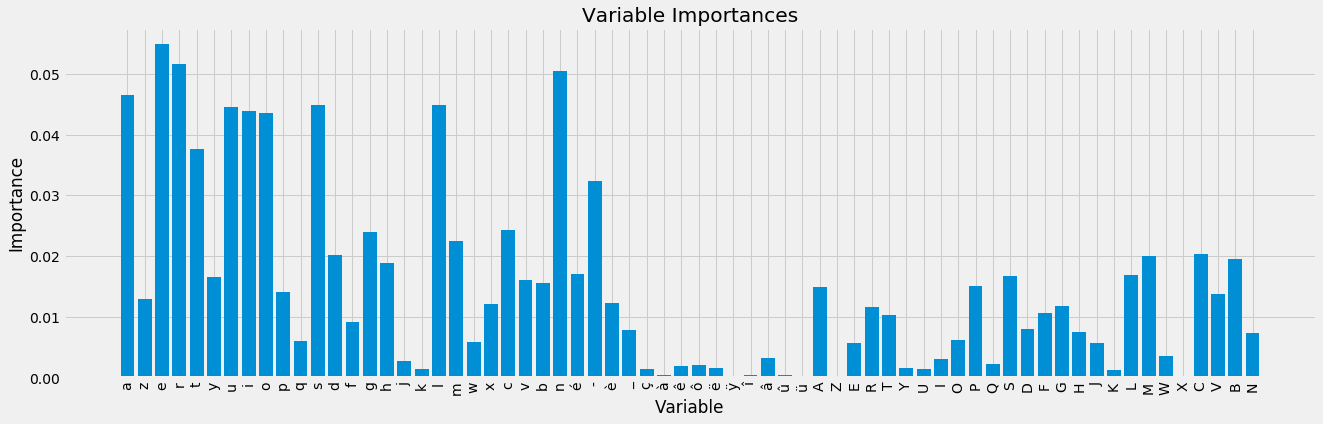

In [24]:
################
#Variable importance
###############

# Get numerical feature importances
importances = list(rf.feature_importances_)

# Set the style
style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

figure(figsize=(20,6))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, dictionnary, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')

### Selection of variables

In [28]:
rf1=RandomForestClassifier(n_estimators=450,max_depth=23,max_features='sqrt')
rf1.fit(XX_app,Y_app)

rf1

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=23, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=450,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
Y_pred=rf1.predict(XX_test)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.22845188284518828


In [47]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

          AL       0.60      0.67      0.64        82
          AQ       0.22      0.20      0.21       238
          AU       0.05      0.02      0.02       122
          BN       0.15      0.09      0.11       186
          BO       0.21      0.26      0.23       224
          BR       0.41      0.32      0.36       116
          CA       0.20      0.12      0.15       205
          CE       0.21      0.14      0.16       177
          FC       0.21      0.12      0.16       184
          HN       0.30      0.23      0.26       143
          IF       0.23      0.11      0.15       131
          LI       0.06      0.01      0.02        71
          LO       0.29      0.32      0.30       218
          LR       0.21      0.11      0.14       147
          MP       0.22      0.52      0.31       324
          NP       0.29      0.17      0.22       156
          PA       0.11      0.03      0.05        86
          PC       0.21    

### Binary Random Forests

In [40]:
def regions_initialization(INPUT=communes_dataframe,pattern='region'):
    OUTPUT=[]
    for tmp in INPUT[pattern]:
        if OUTPUT.count(tmp)==0: OUTPUT.append(tmp)
    return(array(OUTPUT))


regions=regions_initialization()
regions

array(['RA', 'PI', 'AU', 'PA', 'CA', 'MP', 'LR', 'BN', 'PC', 'CE', 'LI',
       'BO', 'BR', 'AQ', 'FC', 'HN', 'PL', 'LO', 'NP', 'AL', 'IF'],
      dtype='<U2')

OK

In [41]:
def binary_region_initialization(region,INPUT):
    OUTPUT=[]
    for tmp in INPUT:
        if tmp==region: OUTPUT.append(1)
        else: OUTPUT.append(0)
    return(array(OUTPUT))

#TEST
binary_region_initialization('PA',['PA','HN','PA'])

array([1, 0, 1])

Let's now:

1) Create the binary random forest for each region

2) Calculate the accuracies of the R.F.s

We will see which regions contain the most significant city names.

In [42]:
def rf_binary_accuracy(region,Y_APP=Y_app,Y_TEST=Y_test,X_APP=XX_app,X_TEST=XX_test,n=450):
    Y_TEST=binary_region_initialization(region,Y_TEST)
    Y_APP=binary_region_initialization(region,Y_APP)
    rf=RandomForestClassifier(n_estimators=n,max_depth=23)
    rf.fit(X_APP,Y_APP)
    Y_pred=rf.predict(X_TEST)
    #print('Acuuracy for ',region,': ',metrics.accuracy_score(Y_TEST, Y_pred))
    return(metrics.accuracy_score(Y_TEST, Y_pred))

for r in regions:
    print('Acuuracy for ',r,': ',rf_binary_accuracy(r))

Acuuracy for  RA :  0.9252440725244072
Acuuracy for  PI :  0.9386331938633193
Acuuracy for  AU :  0.9656903765690377
Acuuracy for  PA :  0.9754532775453277
Acuuracy for  CA :  0.9422594142259414
Acuuracy for  MP :  0.9096234309623431
Acuuracy for  LR :  0.9584379358437936
Acuuracy for  BN :  0.9475592747559275
Acuuracy for  PC :  0.9648535564853556
Acuuracy for  CE :  0.9503486750348675
Acuuracy for  LI :  0.9796373779637378
Acuuracy for  BO :  0.9366806136680613
Acuuracy for  BR :  0.9698744769874477
Acuuracy for  AQ :  0.9338912133891213
Acuuracy for  FC :  0.9486750348675035
Acuuracy for  HN :  0.9589958158995816
Acuuracy for  PL :  0.9556485355648535
Acuuracy for  LO :  0.9394700139470014
Acuuracy for  NP :  0.9567642956764296
Acuuracy for  AL :  0.9849372384937238
Acuuracy for  IF :  0.9629009762900976
